In [157]:
# loading the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [158]:
# Loading the dataset

df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [159]:
# checking for shape

df.shape

(1303, 12)

In [160]:
# checking for duplicates

df.duplicated().sum()

0

In [161]:
# Checking for null values

df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


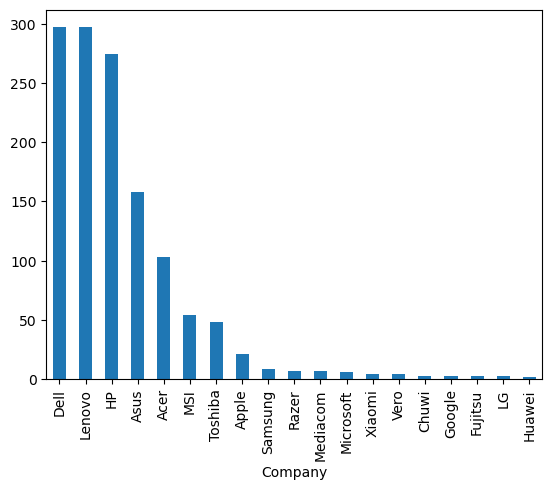

In [163]:
# Count of each Company 

df.Company.value_counts().plot(kind = 'bar')
plt.show()

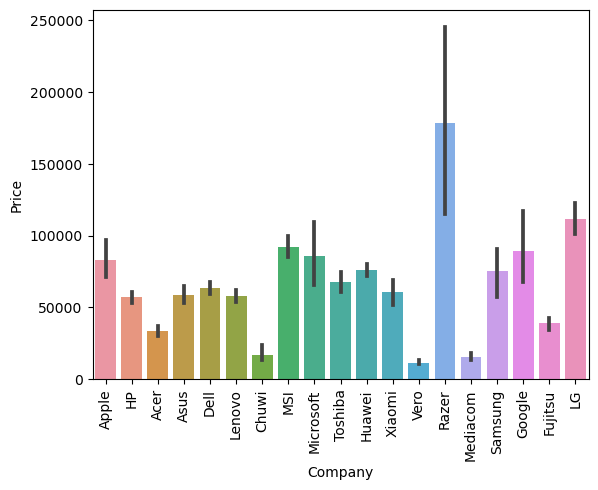

In [164]:
# Average price for each company

sns.barplot(data= df, x = 'Company', y = 'Price')
plt.xticks(rotation = 'vertical')
plt.show()

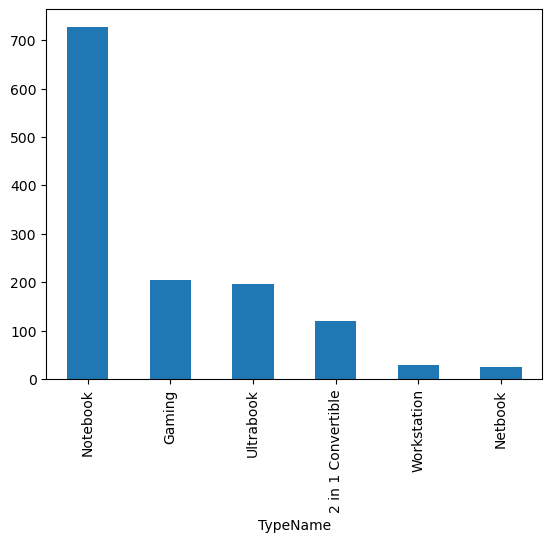

In [165]:
# count of each model

df.TypeName.value_counts().plot(kind = 'bar')
plt.show()

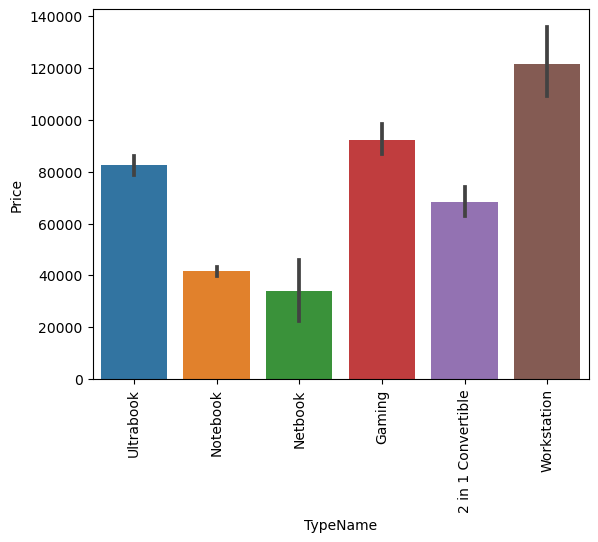

In [166]:
# Average price for Types of Laptops

sns.barplot(data= df, x = 'TypeName', y = 'Price')
plt.xticks(rotation = 'vertical')
plt.show()

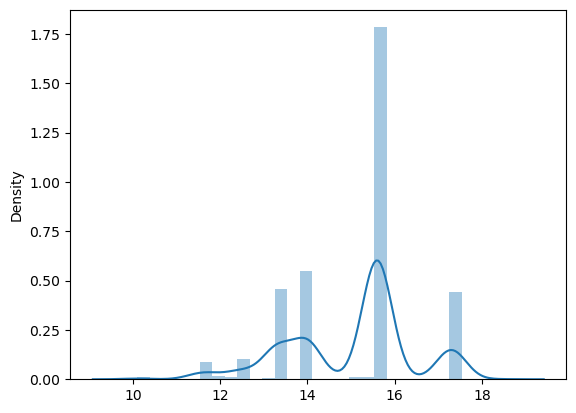

In [167]:
# Distribution of Inches column

sns.distplot(x = df['Inches'])
plt.show()

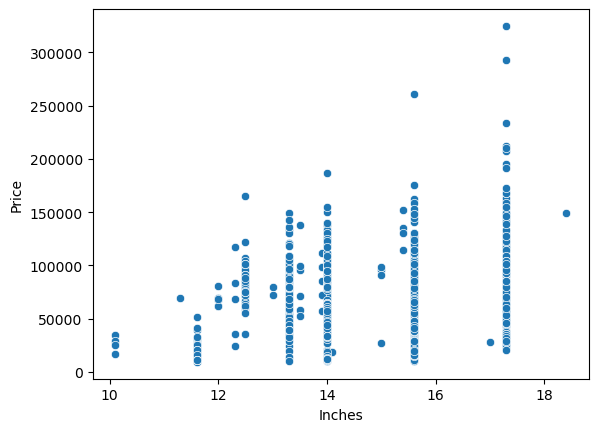

In [168]:
sns.scatterplot(data = df, x = 'Inches', y = 'Price')
plt.show()

The Scatter plot shows that, there is slightly a linear relation between Inches and price of the laptop . As Inches increases price also increases, There is slightly a correlation between this two columns

In [169]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

Since there are two main categories in the screen resolution columns , that is Touchscreen, IPS, Resolution. We are diving it into separate columns

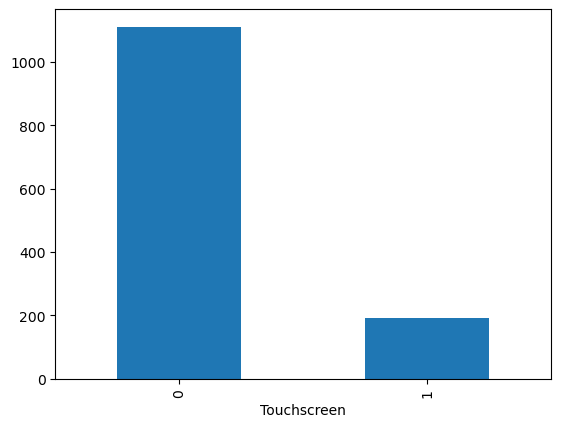

In [170]:
# Creating Touchscreen column

df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)
df['Touchscreen'].value_counts().plot(kind = 'bar')
plt.show()

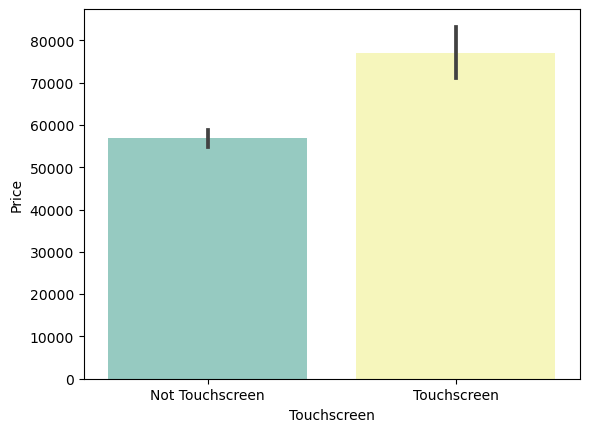

In [171]:
# vsiualizing the touchscreen average price with respect to the ips column

sns.barplot(data = df, x = 'Touchscreen', y = 'Price', palette = 'Set3')
plt.xticks([0,1], ['Not Touchscreen', 'Touchscreen'])
plt.show()

In [172]:
# Creating ips column

df['ips'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1


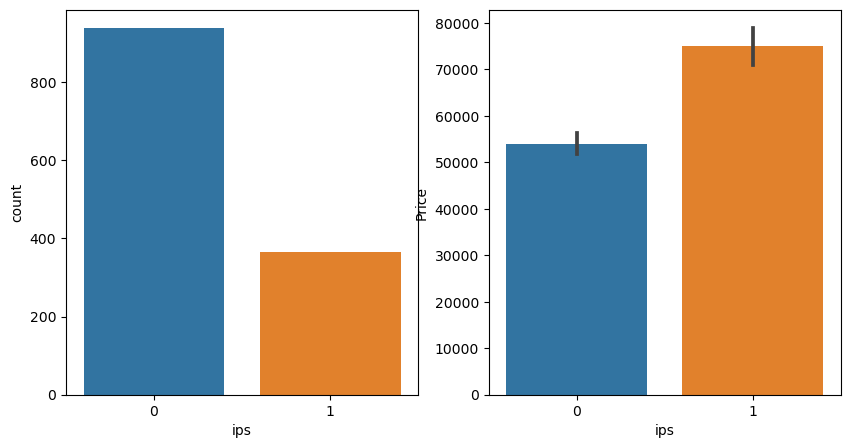

In [173]:
fig, axes = plt.subplots(1,2, figsize = (10,5))

# plotting the count
sns.countplot(ax = axes[0], data = df, x = 'ips')

# plotting the average price of ips and non ips laptop
sns.barplot(data = df, x = 'ips', y = 'Price')

plt.show()

In [174]:
# Creating X resolution and Y Resolution columns

df[['X_res','Y_res']] = df['ScreenResolution'].str.split(' ').str[-1].str.split('x', expand = True)
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600


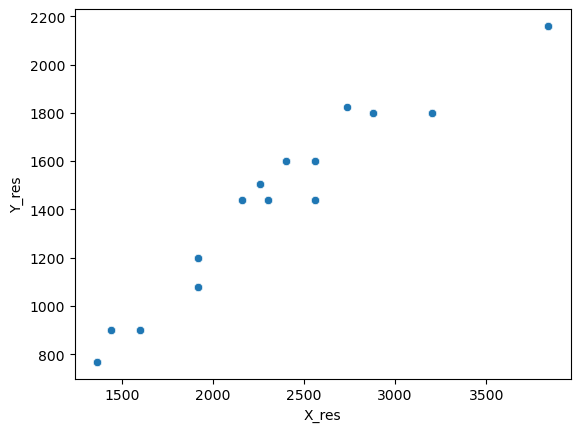

In [175]:
sns.scatterplot(data = df, x = 'X_res', y = 'Y_res')
plt.show()

Since there is a multicolinearity between the X_res and Y_res , we cannot use them , so we are creating a new column PPI. Pixels per inch (PPI) is typically used to refer to the display resolution, or pixel density, of a laptop screen. The greater the pixels per inch (PPI), the greater the detail in the image or display.

**Use The Formula: √(Width Resolution^2 + Height Resolution^2) / Diagonal.**

In [176]:
# creating ppi column

df['ppi'] = ((((df['X_res'])**2)+((df['Y_res'])**2))**0.5/df['Inches']).astype(float)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,X_res,Y_res,ppi
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600,226.983005
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900,127.677940
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080,141.211998
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800,220.534624
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600,226.983005


In [177]:
# dropping columns

df.drop(columns = {'Unnamed: 0','Inches', 'X_res', 'Y_res', 'ScreenResolution'}, inplace = True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005


In [178]:
df.Ram.value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [179]:
df.Weight.value_counts()

Weight
2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

In [180]:
df['Ram'] = df.Ram.str.replace('GB', '').astype(int)
df['Weight'] = df.Weight.str.replace('kg', '').astype(float)

<function matplotlib.pyplot.show(close=None, block=None)>

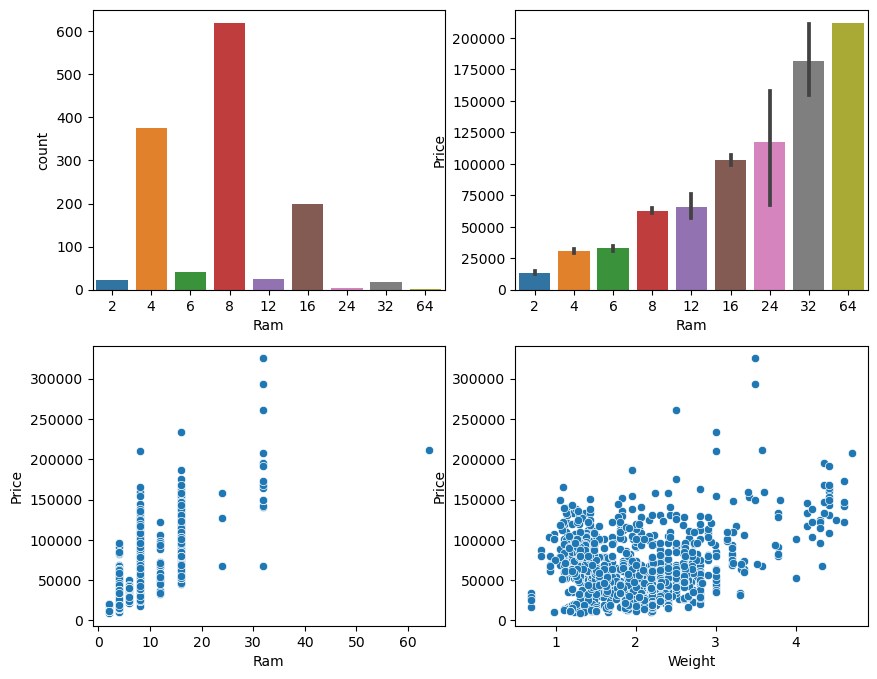

In [181]:
fig, axes = plt.subplots(2,2, figsize = (10,8))

# countplot for ram
sns.countplot(ax = axes[0,0], data = df, x = 'Ram')

# average price with respect to ram
sns.barplot(ax = axes[0,1], data = df, x = 'Ram', y = 'Price')

# relation between ram and price of laptop
sns.scatterplot(ax = axes[1,0], data = df, x = 'Ram', y = 'Price')

# relation between weight and price of laptop
sns.scatterplot(ax = axes[1,1], data = df, x = 'Weight', y = 'Price')
plt.show

In [182]:
df['cpu_name'] = df.Cpu.str.split(' ').str[0:3].str.join(' ')
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [183]:
df.cpu_name.value_counts()

cpu_name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1

In [184]:
def company(x):
    if x =='Intel Core i7' or x == 'Intel Core i5' or x == 'Intel Core i3':
        return x
    else:
        if x.split()[0] == 'Intel':
            return 'other Intel Processor'
        else:
            return 'AMD Processor'
 

df['cpu_brand'] = df['cpu_name'].apply(company)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu_name,cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


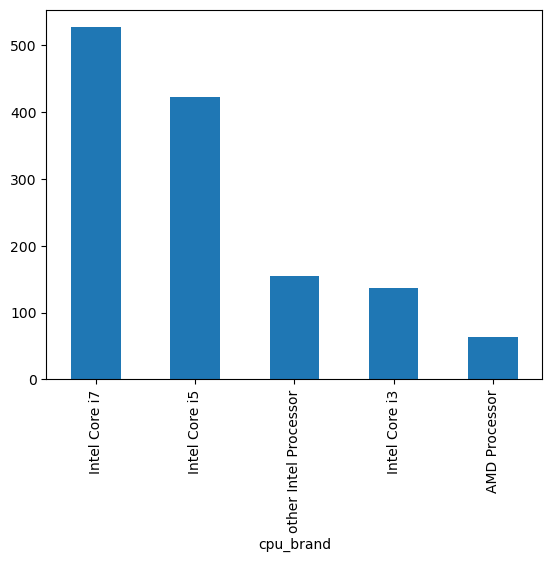

In [185]:
df['cpu_brand'].value_counts().plot(kind = 'bar')
plt.show()

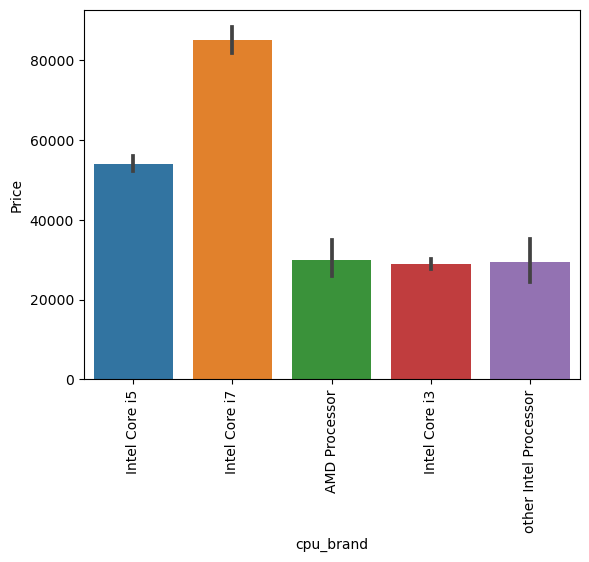

In [186]:
# Average price of each cpu_brand

sns.barplot(data = df, x = 'cpu_brand', y = 'Price')
plt.xticks(rotation = 'vertical')
plt.show()

In [187]:
df.drop(columns = ['Cpu', 'cpu_name'], inplace = True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [188]:
df['Memory'] = df['Memory'].str.replace('GB', '').str.replace('.0','').str.replace('TB', '000')

In [189]:
new = df['Memory'].str.split('+', expand = True)

In [190]:
df['first'] = new[0].str.strip()
df['second'] = new[1].fillna('0')

In [191]:
df['layer1_hdd'] = df['first'].apply(lambda x : 1 if 'HDD' in x else 0)
df['layer1_ssd'] = df['first'].apply(lambda x : 1 if 'SSD' in x else 0)
df['layer1_hybrid'] = df['first'].apply(lambda x : 1 if 'Hybrid' in x else 0)
df['layer1_flash'] = df['first'].apply(lambda x : 1 if 'Flash' in x else 0)

In [192]:
df['layer2_hdd'] = df['second'].apply(lambda x : 1 if 'HDD' in x else 0)
df['layer2_ssd'] = df['second'].apply(lambda x : 1 if 'SSD' in x else 0)
df['layer2_hybrid'] = df['second'].apply(lambda x : 1 if 'Hybrid' in x else 0)
df['layer2_flash'] = df['second'].apply(lambda x : 1 if 'Flash' in x else 0)

In [193]:
df['first'] = df['first'].str.replace('[^0-9]', '', regex = True).astype(int)
df['second'] = df['second'].str.replace('[^0-9]', '', regex = True).astype(int)

In [194]:
df['HDD'] = (df['first']*df['layer1_hdd'])+(df['second']*df['layer2_hdd'])
df['SSD'] = (df['first']*df['layer1_ssd'])+(df['second']*df['layer2_ssd'])
df['Hybrid'] = (df['first']*df['layer1_hybrid'])+(df['second']*df['layer2_hybrid'])
df['Flash_Storage'] = (df['first']*df['layer1_flash'])+(df['second']*df['layer2_flash'])

In [195]:
df['Memory HDD	SSD	Hybrid	Flash_Storage'.split()].sample(50)

,Memory,HDD,SSD,Hybrid,Flash_Storage
46,128 SSD,0,128,0,0
205,512 SSD,0,512,0,0
31,32 Flash Storage,0,0,0,32
379,1000 HDD,1000,0,0,0
1000,128 SSD + 1000 HDD,1000,128,0,0
1137,1000 HDD,1000,0,0,0
1118,512 SSD,0,512,0,0
530,128 SSD + 1000 HDD,1000,128,0,0
169,500 HDD,500,0,0,0
936,1000 HDD,1000,0,0,0


In [196]:
df.drop(columns = 'Memory first second layer1_hdd layer2_hdd layer1_ssd layer2_ssd layer1_hybrid layer1_flash layer2_hybrid layer2_flash'.split(), inplace = True)

In [197]:
# describing

numeric_col = df.select_dtypes(include='number')
numeric_col.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

Since there is only less correlation with Hybrid and Flash_Storage we are dropping them

In [198]:
df.drop(columns = {'Hybrid', 'Flash_Storage'}, inplace = True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [199]:
df['gpu_brand'] = df.Gpu.str.split(' ').str[0]

In [200]:
df['gpu_brand'].value_counts()

gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [201]:
df = df[df['gpu_brand'] != 'ARM']

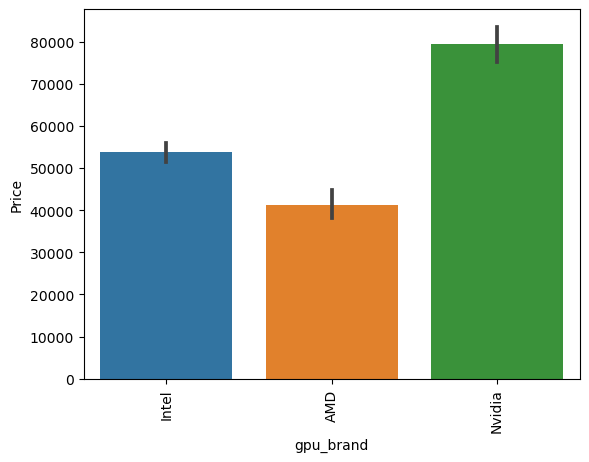

In [202]:
# average price of each gpu brand

sns.barplot(data = df, x = 'gpu_brand', y = 'Price')
plt.xticks(rotation = 'vertical')
plt.show()

In [203]:
df.drop(columns = {'Gpu'}, inplace = True)

In [204]:
df.OpSys.value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [205]:
def category(x):
    if x == 'Windows 10' or x == 'Windows 7' or x == 'Windows 10 S':
        return 'Windows'
    else:
        if x =='macOS' or x == 'Mac OS X':
            return 'Mac'
        else:
            return 'others/No OS/Linux'
    
df['os'] = df.OpSys.apply(category)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


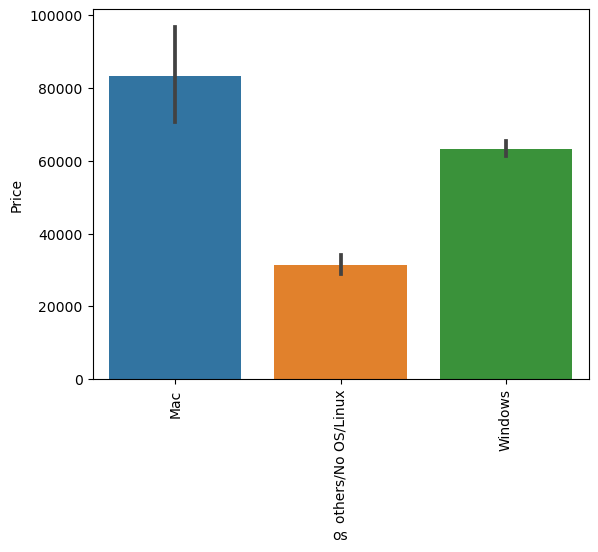

In [206]:
sns.barplot(data = df, x = 'os', y = 'Price')
plt.xticks(rotation = 'vertical')
plt.show()

In [207]:
df.drop(columns = 'OpSys', inplace = True)
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


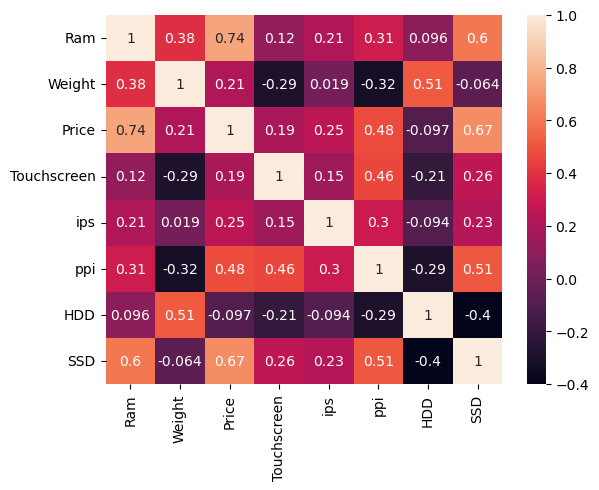

In [208]:
num_col = df.select_dtypes(include = 'number')
sns.heatmap(num_col.corr(), annot = True)
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

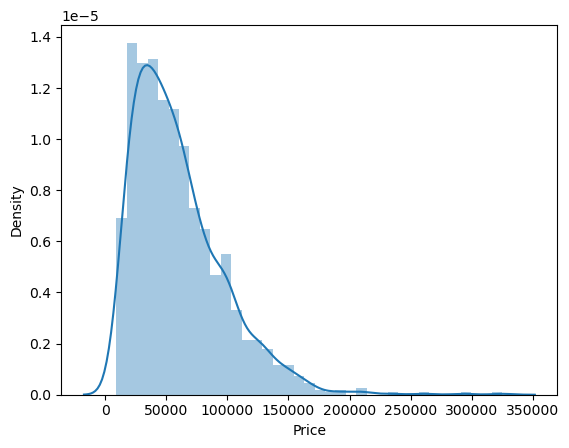

In [209]:
sns.distplot(df.Price)

Since the prie column is positively skewed we are applying log transformation

<Axes: xlabel='Price', ylabel='Density'>

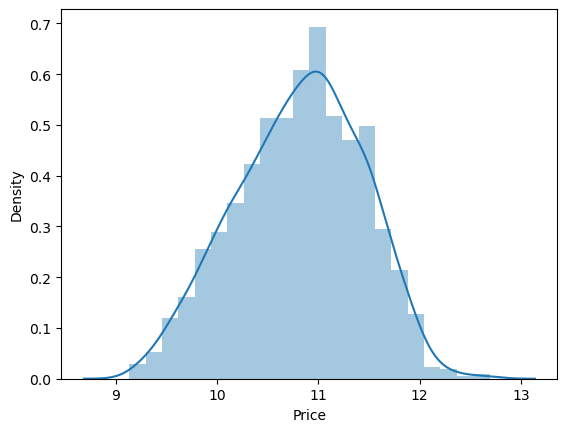

In [210]:
sns.distplot(np.log(df.Price))

In [211]:
df['Price'] = np.log(df['Price'])

In [212]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,others/No OS/Linux
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float64
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   ips          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   cpu_brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  gpu_brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 137.3+ KB


In [214]:
X = df.drop(columns = 'Price')
Y = df.Price

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 2)

# 1. Linear Regression

In [216]:
step1 = ColumnTransformer(transformers = [('col_tran', OneHotEncoder(), [0,1,7,10,11])], remainder = 'passthrough')
step2 = LinearRegression()
pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, Y_train)


# training dataset
print('Training Data : \n')
py_pre = pipe.predict(X_train)
print('R2 Score : ', r2_score(Y_train, py_pre))
print('Mean Absolute Error : ', mean_absolute_error(Y_train, py_pre))

# testing dataset
print('\nTesting Data : \n')
py_pre = pipe.predict(X_test)
print('R2 Score : ', r2_score(Y_test, py_pre))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, py_pre))

Training Data : 

R2 Score :  0.8339632765050136
Mean Absolute Error :  0.19852314813301353

Testing Data : 

R2 Score :  0.8072356802790868
Mean Absolute Error :  0.21018765553460036


# 2. K Neighbors Regressor

In [217]:
step1 = ColumnTransformer(transformers = [('col_tran', OneHotEncoder(), [0,1,7,10,11])], remainder = 'passthrough')
step2 = KNeighborsRegressor(n_neighbors = 3)
pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, Y_train)

# training dataset
print('Training Data : \n')
py_pre = pipe.predict(X_train)
print('R2 Score : ', r2_score(Y_train, py_pre))
print('Mean Absolute Error : ', mean_absolute_error(Y_train, py_pre))

# testing dataset
print('\nTesting Data : \n')
py_pre = pipe.predict(X_test)
print('R2 Score : ', r2_score(Y_test, py_pre))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, py_pre))

Training Data : 

R2 Score :  0.902919332170899
Mean Absolute Error :  0.13977924483859464

Testing Data : 

R2 Score :  0.8017370711834125
Mean Absolute Error :  0.19198724384442825


# 3. Decision Tree Regressor

In [218]:
step1 = ColumnTransformer(transformers = [('col_tran', OneHotEncoder(), [0,1,7,10,11])], remainder = 'passthrough')
step2 = DecisionTreeRegressor(max_depth = 8)
pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, Y_train)

# training dataset
print('Training Data : \n')
py_pre = pipe.predict(X_train)
print('R2 Score : ', r2_score(Y_train, py_pre))
print('Mean Absolute Error : ', mean_absolute_error(Y_train, py_pre))

# testing dataset
print('\nTesting Data : \n')
py_pre = pipe.predict(X_test)
print('R2 Score : ', r2_score(Y_test, py_pre))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, py_pre))

Training Data : 

R2 Score :  0.9160580342571158
Mean Absolute Error :  0.13226406670750213

Testing Data : 

R2 Score :  0.8339667032629483
Mean Absolute Error :  0.18680025921703192


# 4. Lasso Regression

In [219]:
from sklearn.linear_model import Lasso
step1 = ColumnTransformer(transformers = [('col_tran', OneHotEncoder(), [0,1,7,10,11])], remainder = 'passthrough')
step2 = Lasso(alpha = 0.001)
pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, Y_train)

# training dataset
print('Training Data : \n')
py_pre = pipe.predict(X_train)
print('R2 Score : ', r2_score(Y_train, py_pre))
print('Mean Absolute Error : ', mean_absolute_error(Y_train, py_pre))

# testing dataset
print('\nTesting Data : \n')
py_pre = pipe.predict(X_test)
print('R2 Score : ', r2_score(Y_test, py_pre))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, py_pre))

Training Data : 

R2 Score :  0.8282808891735209
Mean Absolute Error :  0.20268597129875943

Testing Data : 

R2 Score :  0.8078786784884522
Mean Absolute Error :  0.21042073115994134


# 5. Random Forest Regressor

In [220]:
step1 = ColumnTransformer(transformers = [('col_tran', OneHotEncoder(sparse_output=False), [0,1,7,10,11])], remainder = 'passthrough')
step2 = RandomForestRegressor()
pipe = Pipeline([('step1', step1), ('step2', step2)])
pipe.fit(X_train, Y_train)

# training dataset
print('Training Data : \n')
py_pre = pipe.predict(X_train)
print('R2 Score : ', r2_score(Y_train, py_pre))
print('Mean Absolute Error : ', mean_absolute_error(Y_train, py_pre))

# testing dataset
print('\nTesting Data : \n')
py_pre = pipe.predict(X_test)
print('R2 Score : ', r2_score(Y_test, py_pre))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, py_pre))

Training Data : 

R2 Score :  0.9804517426122769
Mean Absolute Error :  0.06437345837165526

Testing Data : 

R2 Score :  0.8871653981533871
Mean Absolute Error :  0.15517783328117427


In [88]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))